# Exercise 2.5 of the RL book

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

In [2]:
k = 10
stddev = 1.0
mean_inc = 0.0
stddev_inc = 0.01
alpha = 0.1
epsilon = 0.1
n_steps = 10000
max_int = 2**32 - 1

In [3]:
class Method(Enum):
    sample_average = 0
    constant_stepsize = 1

In [4]:
def algorithm(method):
    q_star = np.zeros(k)
    Q = np.zeros(k)
    N = np.zeros(k)
    
    R = [0.0]
    for i in range(n_steps):
        if np.random.random() < epsilon:
            a = np.random.randint(k)
        else:
            a = np.argmax(Q)
        
        q_star += np.random.normal(mean_inc, stddev_inc, k)
        r = np.random.normal(q_star[a], stddev)
        R.append(R[-1] + r)
        
        N[a] += 1
        
        if method == Method.sample_average:
            stepsize = 1 / N[a]
        elif method == Method.constant_stepsize:
            stepsize = alpha
        Q[a] += stepsize * (r - Q[a])

    for i in range(1, n_steps+1):
        R[i] /= i
    return R

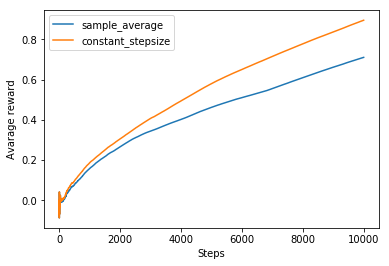

In [5]:
Rs = [[], []]
for i in range(100):
    seed = np.random.randint(max_int)
    
    for m in range(len(Method)):
        np.random.seed(seed)
        R = algorithm(Method(m))
        Rs[m].append(R)
    
for m in range(len(Method)):
    plt.plot(np.average(Rs[m], axis=0))
plt.xlabel('Steps')
plt.ylabel('Avarage reward')
plt.legend([m.name for m in Method])